<a href="https://colab.research.google.com/github/HansHenseler/masdav2024/blob/main/Part_1_Data_Analysis_in_Python_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Analysis introduction

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2024

This exercise starts with examples of most common data analysis tasks with Python, from the features of Python itself to using modules like Pandas with a few exercises that you can try to accomplish yourself.

# Part 1

## 1 A Note About Python Versions
All examples in this cheat sheet use Python 3. We recommend using the latest stable version of Python, for example, Python 3.8. You can check which version you have installed on your machine by running the following command in the system shell:

In [1]:
!python --version

Python 3.10.12


In [ ]:
# We need some files with sample data for the examples and excersises this morning.

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2 Libraries and Imports
The easiest way to install Python modules that are needed for data analysis is to use pip. Installing NumPy and Pandas takes only a few seconds. In colab these libraries come pre installed. Once you’ve installed the modules, use the import statement to make the modules available in your program:

In [2]:
import numpy as np
import pandas as pd


## 3 Getting Help With Python Data Analysis Functions
If you get stuck,the Google Colab interface offers context sensitive help when you are typing code. In other situations the built-in Python docs are a great place to check for tips and ways to solve the problem. The Python help() function displays the help article for a method or a class.

## 4 Working with data sources
Pandas provides a number of easy-to-use data import methods, including CSV and TSV import, copying from the system clipboard, and reading and writing JSON files. This is sufficient for most Python data analysis tasks:

In [16]:
# Connect your drive to the Testdata folder that you have requested permission for.
# Check if the path to the file "DirPrint_Filelist - clean.xlsx" is valid. If not correct it

df = pd.read_excel('/content/drive/MyDrive/Testdata/DirPrint_Filelist - clean.xlsx')
df

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE
...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3


## 5 Working with Pandas Data Frames
Pandas data frames are a great way to explore, clean, tweak, and filter your data sets while doing data analysis in Python. This section covers a few of the things you can do with your Pandas data frames.

# Exploring data
Here are a few functions that allow you to easily know more about the data set you are working on:#

In [17]:
# show the data types of the columns
#
df.dtypes

Attributes            object
Created       datetime64[ns]
LastMod       datetime64[ns]
LastAcc       datetime64[ns]
Size                   int64
Name                  object
Path                  object
Folder                object
Ext                   object
Md5                   object
dtype: object

In [18]:
# show the number of columns and rows
df.shape

(255831, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255831 entries, 0 to 255830
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Attributes  191301 non-null  object        
 1   Created     255831 non-null  datetime64[ns]
 2   LastMod     255831 non-null  datetime64[ns]
 3   LastAcc     255831 non-null  datetime64[ns]
 4   Size        255831 non-null  int64         
 5   Name        255831 non-null  object        
 6   Path        255831 non-null  object        
 7   Folder      255831 non-null  object        
 8   Ext         255628 non-null  object        
 9   Md5         255831 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 19.5+ MB


In [20]:
df[:2]

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811


In [21]:
df[2:]

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE
5,---A----,2018-10-30 00:53:00,2018-09-15 09:28:00,2021-08-12 20:58:00,33951,CoreSingleLanguage.xml,C:\Windows\CoreSingleLanguage.xml,C:\Windows\,xml,1F334AC7713E228137147CBFBB7BC9AA
6,R--A----,2019-07-29 20:19:00,2019-02-23 20:52:00,2021-08-12 20:58:00,26,csup.txt,C:\Windows\csup.txt,C:\Windows\,txt,36EF31C904A5C20F78C89F268602B10D
...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3


In [22]:
df.head()

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE


In [23]:
df.tail()

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3
255830,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,149554,System.Workflow.Runtime.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.runt...,C:\Windows\WinSxS\x86_wwf-system.workflow.runt...,dll,412EF3105A13CF3111539C74E7B7F190


In [24]:
# we can also create a new column that is based on another colum
# The following code splits the path based on \ and stores the array in a new column called Folders
df['Folders']=df['Path'].str.split('\\')
df


,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,"[C:, Windows, aksdrvsetup.log]"
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,"[C:, Windows, bfsvc.exe]"
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]"
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,"[C:, Windows, bootstat.dat]"
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,"[C:, Windows, comsetup.log]"
...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


## 6 Statistical operations
All standard statistical operations like minimums, maximums, and custom quantiles are present in Pandas:

In [25]:
df.describe()

,Created,LastMod,LastAcc,Size
count,255831,255831,255831,2.558310e+05
mean,2021-02-16 12:44:15.513678592,2021-02-04 08:19:39.316111104,2021-07-08 05:55:40.897076736,1.109138e+05
min,1998-06-24 08:00:00,1998-06-24 08:00:00,2001-01-01 02:00:00,0.000000e+00
25%,2021-04-21 18:33:00,2021-04-08 19:40:00,2021-07-08 12:42:00,6.380000e+02
50%,2021-07-08 12:41:00,2021-06-10 05:57:00,2021-07-08 19:39:00,2.437000e+03
75%,2021-07-21 18:07:00,2021-07-04 13:45:00,2021-07-21 18:09:00,9.817000e+03
max,2021-08-12 21:02:00,2021-08-12 21:07:00,2021-08-12 21:19:00,2.460795e+08
std,NaN,NaN,NaN,2.173671e+06


In [26]:
df.count()

Attributes    191301
Created       255831
LastMod       255831
LastAcc       255831
Size          255831
Name          255831
Path          255831
Folder        255831
Ext           255628
Md5           255831
Folders       255831
dtype: int64

In [27]:
df["Size"].mean()

110913.84596081007

In [28]:
df["Size"].max()

246079488

In [29]:
df["Size"].min()

0

In [30]:
df["Size"].quantile(0.25)

638.0

In [31]:
df["Size"].quantile(0.5)

2437.0

<Axes: >

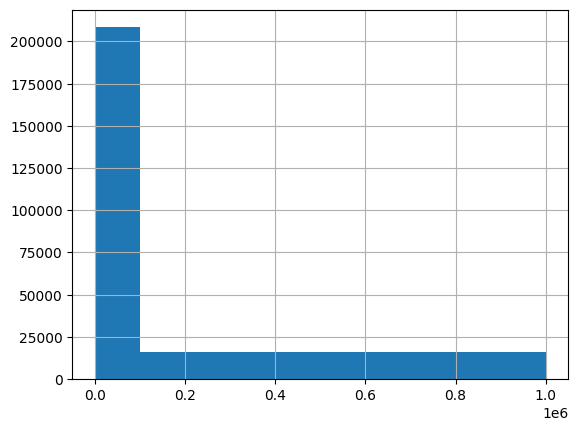

In [32]:
df["Size"].hist(bins=[0,100,150,100000,1000000])

In [42]:
df["Size"].value_counts()

Size
50        12032
52         3492
51         2805
49         2316
162         950
          ...  
5580          1
32610         1
12857         1
106217        1
133512        1
Name: count, Length: 26702, dtype: int64

<Axes: >

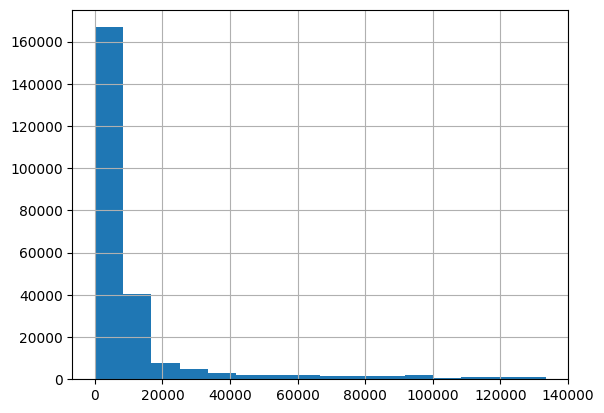

In [38]:
# You can examine all values of Size by resetting the number of max_rows that are displayed
# pd.options.display.max_rows = None
# Restore this
# pd.reset_option('display.max_rows')
# The following bin sizes make more sense for this data set but the first bin
# is still relatively full

df["Size"].hist(bins=[49, 8390, 16731, 25073, 33414, 41756, 50097, 58439, 66780, 75121,
 83463, 91804, 100146, 108487, 116829, 125170, 133512])

## 7 Cleaning the Data
It is quite common to have not-a-number (NaN) values in your data set. To be able to operate on a data set with statistical methods, you’ll first need to clean up the data. The fillna and dropna Pandas functions are a convenient way to replace the NaN values with something more representative for your data set, for example, a zero, or to remove the rows with NaN values from the data frame.

In [43]:
df.isna().sum()

Attributes    64530
Created           0
LastMod           0
LastAcc           0
Size              0
Name              0
Path              0
Folder            0
Ext             203
Md5               0
Folders           0
dtype: int64

In [44]:
clean_df = df
clean_df = df["Attributes"].fillna("Unknown")

In [45]:
clean_df

0         ---A----
1          Unknown
2         ---A----
3         --SA----
4         ---A----
            ...   
255826     Unknown
255827     Unknown
255828     Unknown
255829     Unknown
255830     Unknown
Name: Attributes, Length: 255831, dtype: object

In [46]:
df['Attributes'].dropna()

0         ---A----
2         ---A----
3         --SA----
4         ---A----
5         ---A----
            ...   
255811    ---A----
255812    ---A----
255813    ---A----
255814    ---A----
255815    ---A----
Name: Attributes, Length: 191301, dtype: object

In [47]:
df.replace('---A----','')

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
0,,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,"[C:, Windows, aksdrvsetup.log]"
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,"[C:, Windows, bfsvc.exe]"
2,,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]"
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,"[C:, Windows, bootstat.dat]"
4,,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,"[C:, Windows, comsetup.log]"
...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


## 8 Reading raw text data

In step 4 we read an xlsx file. Read_xlsx nicely formats our data. This is not always the case. As an example there is a small section from the dirprint file which is formatted as tab delimited test. This file has no column names but the columns are the same as in the xlsx file used above: Attributes,Created, LastMod, LastAcc, Size, Name, Path, Folder, Ext, Md5


In [48]:
# The DirPrint_Filelist_small.txt is just a small fragement of the xlsx file we used earlier
# It contains tab delimited data and has no headers. This is a good way to start
#
dfs = pd.read_csv('/content/drive/MyDrive/Testdata/DirPrint_Filelist_small.txt',sep='\t')
dfs.dtypes

---A----                            object
1/5/2021 19:19                      object
1/5/2021 19:19.1                    object
8/12/2021 20:58                     object
22,639                              object
aksdrvsetup.log                     object
C:\Windows\aksdrvsetup.log          object
C:\Windows\                         object
log                                 object
50D08E904772E94EB4B16817EB5BE4F1    object
dtype: object

In [ ]:
# Compare this to the dtypes we got from read_excel (see #3 above):
#
# Attributes            object
# Created       datetime64[ns]
# LastMod       datetime64[ns]
# LastAcc       datetime64[ns]
# Size                   int64
# Name                  object
# Path                  object
# Folder                object
# Ext                   object
# Md5                   object
#
# What's wrong?
#
# hint check the python docs https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
#


In [49]:
# Add column headers
#
dfs.columns = ['Attributes','Created','LastMod','LastAcc','Size','Name','Path','Folder','Ext','Md5']
dfs.dtypes

Attributes    object
Created       object
LastMod       object
LastAcc       object
Size          object
Name          object
Path          object
Folder        object
Ext           object
Md5           object
dtype: object

In [50]:
# Make the Size column an int64 (we need to take care of the , thousands separator)
#
dfs['Size'] = dfs.Size.astype(str).str.replace(',', '').astype(np.int64)
dfs.dtypes

Attributes    object
Created       object
LastMod       object
LastAcc       object
Size           int64
Name          object
Path          object
Folder        object
Ext           object
Md5           object
dtype: object

In [51]:
# Parse the dates
dfs['Created'] = pd.to_datetime(dfs['Created'])
dfs['LastMod'] = pd.to_datetime(dfs['LastMod'])
dfs['LastAcc'] = pd.to_datetime(dfs['LastAcc'])
dfs.dtypes

Attributes            object
Created       datetime64[ns]
LastMod       datetime64[ns]
LastAcc       datetime64[ns]
Size                   int64
Name                  object
Path                  object
Folder                object
Ext                   object
Md5                   object
dtype: object

In [52]:
# With these operations we have now cleaned/formatted the tab delimited file
# in come cases we want a column the be the index of the data frame.
#
dfs = dfs.set_index("LastMod")
dfs.dtypes

Attributes            object
Created       datetime64[ns]
LastAcc       datetime64[ns]
Size                   int64
Name                  object
Path                  object
Folder                object
Ext                   object
Md5                   object
dtype: object

In [53]:
dfs

,Attributes,Created,LastAcc,Size,Name,Path,Folder,Ext,Md5
LastMod,,,,,,,,,
2021-04-22 19:57:00,---A---X,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811
2020-08-18 10:54:00,---A----,2020-08-18 10:52:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552
2021-08-12 08:45:00,--SA----,2020-11-19 09:44:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C
2021-04-22 18:53:00,---A----,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE
2018-09-15 09:28:00,---A----,2018-10-30 00:53:00,2021-08-12 20:58:00,33951,CoreSingleLanguage.xml,C:\Windows\CoreSingleLanguage.xml,C:\Windows\,xml,1F334AC7713E228137147CBFBB7BC9AA
...,...,...,...,...,...,...,...,...,...
2015-07-31 09:57:00,R--A----,2015-07-31 09:57:00,2021-08-12 20:59:00,309936,AS_DataWarehouse_Dll_32_1053.B4988E63_555A_4DE...,C:\Windows\Installer\$PatchCache$\Managed\0000...,C:\Windows\Installer\$PatchCache$\Managed\0000...,B4988E63_555A_4DEB_A5F4_A9E5864569F1,74BEED7208B5C2C57FE6C371198E1663
2015-07-31 09:57:00,R--A----,2015-07-31 09:57:00,2021-08-12 20:59:00,318128,AS_DataWarehouse_Dll_32_1054.B4988E63_555A_4DE...,C:\Windows\Installer\$PatchCache$\Managed\0000...,C:\Windows\Installer\$PatchCache$\Managed\0000...,B4988E63_555A_4DEB_A5F4_A9E5864569F1,72FB831C4DF9DDC37E0E333849A6FC00
2015-07-31 09:57:00,R--A----,2015-07-31 09:57:00,2021-08-12 20:59:00,309936,AS_DataWarehouse_Dll_32_1055.B4988E63_555A_4DE...,C:\Windows\Installer\$PatchCache$\Managed\0000...,C:\Windows\Installer\$PatchCache$\Managed\0000...,B4988E63_555A_4DEB_A5F4_A9E5864569F1,B0ECAFE34CB4B820D621DE096748B827


In [55]:
# If you need to repeat this process for multiple files it is also possible to
# specify this in the call to read_csv as follows
#
from datetime import datetime

# mydateparser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
mydateparser = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')

dfs = pd.read_csv(
    '/content/drive/MyDrive/Testdata/DirPrint_Filelist_small.txt',
    sep="\t",usecols=[0,1,2,3,4,5,6,7,8,9],
    names=['Attributes','Created','LastMod','LastAcc','Size','Name','Path','Folder','Ext','Md5'],
    index_col='LastMod',
    header=0,
    dtype={'Size':np.int64},
    thousands=',',
    parse_dates = ['Created', 'LastMod','LastAcc'],
    date_parser=mydateparser
    )
df.dtypes

<ipython-input-55-7901be974933>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dfs = pd.read_csv(


Attributes            object
Created       datetime64[ns]
LastMod       datetime64[ns]
LastAcc       datetime64[ns]
Size                   int64
Name                  object
Path                  object
Folder                object
Ext                   object
Md5                   object
Folders               object
dtype: object

In [56]:
df

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
0,---A----,2021-01-05 19:19:00,2021-01-05 19:19:00,2021-08-12 20:58:00,22639,aksdrvsetup.log,C:\Windows\aksdrvsetup.log,C:\Windows\,log,50D08E904772E94EB4B16817EB5BE4F1,"[C:, Windows, aksdrvsetup.log]"
1,NaN,2021-04-22 19:57:00,2021-04-22 19:57:00,2021-08-12 20:58:00,77824,bfsvc.exe,C:\Windows\bfsvc.exe,C:\Windows\,exe,862251351EC170BB3BD59CB219491811,"[C:, Windows, bfsvc.exe]"
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]"
3,--SA----,2020-11-19 09:44:00,2021-08-12 08:45:00,2021-08-12 20:58:00,67584,bootstat.dat,C:\Windows\bootstat.dat,C:\Windows\,dat,E68A42FC4CD032E168A66925D63CB96C,"[C:, Windows, bootstat.dat]"
4,---A----,2021-04-22 18:53:00,2021-04-22 18:53:00,2021-08-12 20:58:00,762,comsetup.log,C:\Windows\comsetup.log,C:\Windows\,log,FFD6B7D88934C99E34D5A823B56A03DE,"[C:, Windows, comsetup.log]"
...,...,...,...,...,...,...,...,...,...,...,...
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255827,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,1257472,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,8280BBD8640ECF3826460903760D9774,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


In [57]:
# the datetime type also supports extracting year, month and day of the month

pd.DatetimeIndex(dfs['Created']).year

Index([2021, 2020, 2020, 2021, 2018, 2019, 2021, 2021, 2020, 2019,
       ...
       2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015],
      dtype='int32', name='Created', length=4983)

In [58]:
pd.DatetimeIndex(dfs['Created']).month

Index([ 4,  8, 11,  4, 10,  7,  4,  4,  8, 12,
       ...
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
      dtype='int32', name='Created', length=4983)

In [61]:
pd.DatetimeIndex(dfs['Created']).day

Index([22, 18, 19, 22, 30, 29, 22, 22, 18,  7,
       ...
       31, 31, 31, 31, 31, 31, 31, 31, 31, 31],
      dtype='int32', name='Created', length=4983)

In [62]:
# and even week
#
pd.DatetimeIndex(dfs['Created']).week

AttributeError: 'DatetimeIndex' object has no attribute 'week'

In [ ]:
# and even week
#
pd.DatetimeIndex(dfs['Created']).week

AttributeError: 'DatetimeIndex' object has no attribute 'week'

In [63]:
# and even week (although the method week() was depricated and we have to use isocalendar() in stead)
#
#pd.DatetimeIndex(dfs['Created']).week
pd.DatetimeIndex(dfs['Created']).isocalendar().week

Created
2021-04-22 19:57:00    16
2020-08-18 10:52:00    34
2020-11-19 09:44:00    47
2021-04-22 18:53:00    16
2018-10-30 00:53:00    44
                       ..
2015-07-31 09:57:00    31
2015-07-31 09:57:00    31
2015-07-31 09:57:00    31
2015-07-31 09:57:00    31
2015-07-31 09:57:00    31
Name: week, Length: 4983, dtype: UInt32

## 9 Filtering and sorting
Here are some basic commands for filtering and sorting the data in your data frames.

In [64]:
df.sort_values(by=['Name','Size'],ascending=True)

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
224416,---A----,2019-12-07 11:14:00,2021-07-21 18:14:00,2021-08-11 04:33:00,3328,$$.cdf-ms,C:\Windows\WinSxS\FileMaps\$$.cdf-ms,C:\Windows\WinSxS\FileMaps\,cdf-ms,D6AA98DA11E1ACD3E82998EFAEE3F623,"[C:, Windows, WinSxS, FileMaps, $$.cdf-ms]"
224417,---A----,2019-12-07 11:51:00,2019-12-07 11:51:00,2021-08-07 10:17:00,632,$$_addins_2452dff8cb692cdd.cdf-ms,C:\Windows\WinSxS\FileMaps\$$_addins_2452dff8c...,C:\Windows\WinSxS\FileMaps\,cdf-ms,AF7652FBFF850A0864CC789E42AAA313,"[C:, Windows, WinSxS, FileMaps, $$_addins_2452..."
224418,---A----,2019-12-07 11:14:00,2021-07-08 12:48:00,2021-08-10 11:25:00,580,$$_appcompat_appraiser_33781004733ffeee.cdf-ms,C:\Windows\WinSxS\FileMaps\$$_appcompat_apprai...,C:\Windows\WinSxS\FileMaps\,cdf-ms,F6A9344D5EBB98EF34AD15788BD9BF3B,"[C:, Windows, WinSxS, FileMaps, $$_appcompat_a..."
224419,---A----,2019-12-07 11:14:00,2021-07-08 12:48:00,2021-08-10 11:25:00,592,$$_appcompat_appraiser_telemetry_94274e99519f5...,C:\Windows\WinSxS\FileMaps\$$_appcompat_apprai...,C:\Windows\WinSxS\FileMaps\,cdf-ms,3009EC2BC701A131BFD1A9E52025BC80,"[C:, Windows, WinSxS, FileMaps, $$_appcompat_a..."
224420,---A----,2019-12-07 11:14:00,2021-04-22 20:01:00,2021-08-07 10:17:00,576,$$_appcompat_programs_99c7f419bd54f4ca.cdf-ms,C:\Windows\WinSxS\FileMaps\$$_appcompat_progra...,C:\Windows\WinSxS\FileMaps\,cdf-ms,31630B7D032F521C9AC8203819AD2EB1,"[C:, Windows, WinSxS, FileMaps, $$_appcompat_p..."
...,...,...,...,...,...,...,...,...,...,...,...
166004,--------,2021-07-21 18:08:00,2021-06-10 05:40:00,2021-07-21 18:08:00,216,{a5a7c794-3d59-41df-915f-19acda526fc9}4105.bin,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,bin,88ECF7F38CCD880C509C9706D42B0A42,"[C:, Windows, servicing, LCU, Package_for_Roll..."
57104,--------,2021-07-08 12:41:00,2021-06-10 05:40:00,2021-07-08 12:41:00,301,{a5a7c794-3d59-41df-915f-19acda526fc9}4105.bin,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,bin,5E9715F50A191733DF7338E2CA37ED86,"[C:, Windows, servicing, LCU, Package_for_Roll..."
84885,--------,2021-07-08 12:41:00,2021-06-10 05:40:00,2021-07-08 12:41:00,301,{a5a7c794-3d59-41df-915f-19acda526fc9}4105.bin,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,bin,5E9715F50A191733DF7338E2CA37ED86,"[C:, Windows, servicing, LCU, Package_for_Roll..."
138197,--------,2021-07-21 18:08:00,2021-06-10 05:40:00,2021-07-21 18:08:00,301,{a5a7c794-3d59-41df-915f-19acda526fc9}4105.bin,C:\Windows\servicing\LCU\Package_for_RollupFix...,C:\Windows\servicing\LCU\Package_for_RollupFix...,bin,5E9715F50A191733DF7338E2CA37ED86,"[C:, Windows, servicing, LCU, Package_for_Roll..."


In [65]:
df.query('Size>1000000')

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
2,---A----,2020-08-18 10:52:00,2020-08-18 10:54:00,2021-08-12 20:58:00,3145782,BGInfo.bmp,C:\Windows\BGInfo.bmp,C:\Windows\,bmp,EC80E9F3112F716063C273FC1F75F552,"[C:, Windows, BGInfo.bmp]"
11,NaN,2021-07-21 18:11:00,2021-07-21 18:11:00,2021-08-12 20:55:00,4894304,explorer.exe,C:\Windows\explorer.exe,C:\Windows\,exe,FD5541611456E27D8BF3E90DDA34DC4E,"[C:, Windows, explorer.exe]"
12,NaN,2021-04-22 19:58:00,2021-04-22 19:58:00,2021-08-12 20:58:00,1076736,HelpPane.exe,C:\Windows\HelpPane.exe,C:\Windows\,exe,86AE3BE50DF246C646DA76E7223A968E,"[C:, Windows, HelpPane.exe]"
29,NaN,2020-08-18 10:55:00,2021-01-19 21:11:00,2021-08-12 20:58:00,2591096,sysmon64.exe,C:\Windows\sysmon64.exe,C:\Windows\,exe,8A914CFB7496B8461285C009DD8F5627,"[C:, Windows, sysmon64.exe]"
40,---A----,2021-04-23 04:33:00,2021-08-12 03:42:00,2021-08-12 20:58:00,2134440,APPRAISER_TelemetryBaseline_21H1.bin,C:\Windows\appcompat\appraiser\APPRAISER_Telem...,C:\Windows\appcompat\appraiser\,bin,CFD2B520843FFEB5DE2CDE1AC9D8C702,"[C:, Windows, appcompat, appraiser, APPRAISER_..."
...,...,...,...,...,...,...,...,...,...,...,...
255805,NaN,2019-12-07 11:10:00,2019-12-07 11:29:00,2021-07-08 19:36:00,1645522,System.ServiceModel.dll,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,dll,EC4666DE4B22AA2AAB14747C457491F8,"[C:, Windows, WinSxS, x86_wcf-system.servicemo..."
255806,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,1645234,System.ServiceModel.dll,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,dll,B696345964D0A57F086E618FCA33CC5F,"[C:, Windows, WinSxS, x86_wcf-system.servicemo..."
255818,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,1563880,PresentationFramework.dll,C:\Windows\WinSxS\x86_wpf-presentationframewor...,C:\Windows\WinSxS\x86_wpf-presentationframewor...,dll,7FD9160DC15A44B701CFCE1B462DE616,"[C:, Windows, WinSxS, x86_wpf-presentationfram..."
255819,NaN,2021-04-22 20:02:00,2020-09-05 04:07:00,2021-07-08 19:35:00,5292032,PresentationFramework.dll,C:\Windows\WinSxS\x86_wpf-presentationframewor...,C:\Windows\WinSxS\x86_wpf-presentationframewor...,dll,C05744DB2DAD288DDA70D04A8FAD5C28,"[C:, Windows, WinSxS, x86_wpf-presentationfram..."


In [66]:
# use column names as Python attributes to filter with multiple clauses
df[(df.Size>100000) & (df.Size<1000000)]

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
16,NaN,2021-07-08 12:47:00,2021-07-08 12:47:00,2021-08-10 11:26:00,211968,notepad.exe,C:\Windows\notepad.exe,C:\Windows\,exe,1C1760ED4D19CDBECB2398216922628B,"[C:, Windows, notepad.exe]"
20,NaN,2019-12-18 23:26:00,2019-12-18 23:26:00,2021-08-12 20:58:00,909896,py.exe,C:\Windows\py.exe,C:\Windows\,exe,A2CE303C3713D3BD12529C960EC84C2F,"[C:, Windows, py.exe]"
22,NaN,2019-12-18 23:26:00,2019-12-18 23:26:00,2021-08-12 20:58:00,909896,pyw.exe,C:\Windows\pyw.exe,C:\Windows\,exe,83E42FE58809E861324AF64FA6CAD9AF,"[C:, Windows, pyw.exe]"
23,NaN,2021-04-22 19:58:00,2021-04-22 19:58:00,2021-07-21 18:04:00,370176,regedit.exe,C:\Windows\regedit.exe,C:\Windows\,exe,BD63D72DB4FA96A1E0250B1D36B7A827,"[C:, Windows, regedit.exe]"
28,NaN,2021-07-08 12:45:00,2021-07-08 12:45:00,2021-08-12 20:56:00,136192,splwow64.exe,C:\Windows\splwow64.exe,C:\Windows\,exe,04D8E1F5355152807A7B8EB12F18C61F,"[C:, Windows, splwow64.exe]"
...,...,...,...,...,...,...,...,...,...,...,...
255825,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,536576,ReachFramework.dll,C:\Windows\WinSxS\x86_wpf-reachframework_31bf3...,C:\Windows\WinSxS\x86_wpf-reachframework_31bf3...,dll,B608A2F11885485F06B7D03C21ACAD9E,"[C:, Windows, WinSxS, x86_wpf-reachframework_3..."
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


In [67]:
# or access columns with the df[] syntax
df[(df['Size']>100000) & (df['Size']<1000000)]

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
16,NaN,2021-07-08 12:47:00,2021-07-08 12:47:00,2021-08-10 11:26:00,211968,notepad.exe,C:\Windows\notepad.exe,C:\Windows\,exe,1C1760ED4D19CDBECB2398216922628B,"[C:, Windows, notepad.exe]"
20,NaN,2019-12-18 23:26:00,2019-12-18 23:26:00,2021-08-12 20:58:00,909896,py.exe,C:\Windows\py.exe,C:\Windows\,exe,A2CE303C3713D3BD12529C960EC84C2F,"[C:, Windows, py.exe]"
22,NaN,2019-12-18 23:26:00,2019-12-18 23:26:00,2021-08-12 20:58:00,909896,pyw.exe,C:\Windows\pyw.exe,C:\Windows\,exe,83E42FE58809E861324AF64FA6CAD9AF,"[C:, Windows, pyw.exe]"
23,NaN,2021-04-22 19:58:00,2021-04-22 19:58:00,2021-07-21 18:04:00,370176,regedit.exe,C:\Windows\regedit.exe,C:\Windows\,exe,BD63D72DB4FA96A1E0250B1D36B7A827,"[C:, Windows, regedit.exe]"
28,NaN,2021-07-08 12:45:00,2021-07-08 12:45:00,2021-08-12 20:56:00,136192,splwow64.exe,C:\Windows\splwow64.exe,C:\Windows\,exe,04D8E1F5355152807A7B8EB12F18C61F,"[C:, Windows, splwow64.exe]"
...,...,...,...,...,...,...,...,...,...,...,...
255825,NaN,2021-04-22 20:02:00,2020-09-05 03:54:00,2021-07-08 19:35:00,536576,ReachFramework.dll,C:\Windows\WinSxS\x86_wpf-reachframework_31bf3...,C:\Windows\WinSxS\x86_wpf-reachframework_31bf3...,dll,B608A2F11885485F06B7D03C21ACAD9E,"[C:, Windows, WinSxS, x86_wpf-reachframework_3..."
255826,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,375276,WindowsBase.dll,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,C:\Windows\WinSxS\x86_wpf-windowsbase_31bf3856...,dll,4F6CFC1F7C771075F17D039EB24C6276,"[C:, Windows, WinSxS, x86_wpf-windowsbase_31bf..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


In [68]:
# we can use regular expressions to filter through the data. For more
# information see: https://docs.python.org/3/howto/regex.html
#
# For example we want to select all files with name System.*.dll where
# * is not white space. In regex this is denoted by \S
#
df[df.Name.str.match(r'(System[\S]+.dll)')==True]

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
182,NaN,2019-12-07 11:09:00,2019-12-07 11:09:00,2021-08-12 20:58:00,3010560,System.Management.Automation.dll,C:\Windows\assembly\GAC_MSIL\System.Management...,C:\Windows\assembly\GAC_MSIL\System.Management...,dll,6CA7D39D5E569CC91538DD29B88FDAEA,"[C:, Windows, assembly, GAC_MSIL, System.Manag..."
183,NaN,2019-12-07 11:49:00,2019-12-07 11:49:00,2021-08-12 20:58:00,253952,System.Management.Automation.Resources.dll,C:\Windows\assembly\GAC_MSIL\System.Management...,C:\Windows\assembly\GAC_MSIL\System.Management...,dll,1EDD1805695D0359F26427AE951F8C49,"[C:, Windows, assembly, GAC_MSIL, System.Manag..."
310,NaN,2021-08-10 11:31:00,2021-08-10 11:31:00,2021-08-12 20:58:00,10827776,System.ni.dll,C:\Windows\assembly\NativeImages_v4.0.30319_32...,C:\Windows\assembly\NativeImages_v4.0.30319_32...,dll,8A9F2A41BD8B8042BD67C23F99E2AF5E,"[C:, Windows, assembly, NativeImages_v4.0.3031..."
311,---A----,2021-08-10 11:31:00,2021-08-10 11:31:00,2021-08-12 20:58:00,620,System.ni.dll.aux,C:\Windows\assembly\NativeImages_v4.0.30319_32...,C:\Windows\assembly\NativeImages_v4.0.30319_32...,aux,066AFE666317E5B1E2E06B1C3250B46B,"[C:, Windows, assembly, NativeImages_v4.0.3031..."
312,NaN,2021-08-10 11:31:00,2021-08-10 11:31:00,2021-08-12 20:58:00,1060352,System.Configuration.ni.dll,C:\Windows\assembly\NativeImages_v4.0.30319_32...,C:\Windows\assembly\NativeImages_v4.0.30319_32...,dll,3C2C6EAADDE0E2750907EFAEB20C975C,"[C:, Windows, assembly, NativeImages_v4.0.3031..."
...,...,...,...,...,...,...,...,...,...,...,...
255805,NaN,2019-12-07 11:10:00,2019-12-07 11:29:00,2021-07-08 19:36:00,1645522,System.ServiceModel.dll,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,dll,EC4666DE4B22AA2AAB14747C457491F8,"[C:, Windows, WinSxS, x86_wcf-system.servicemo..."
255806,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,1645234,System.ServiceModel.dll,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,C:\Windows\WinSxS\x86_wcf-system.servicemodel_...,dll,B696345964D0A57F086E618FCA33CC5F,"[C:, Windows, WinSxS, x86_wcf-system.servicemo..."
255828,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,312556,System.Workflow.Activities.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,C:\Windows\WinSxS\x86_wwf-system.workflow.acti...,dll,DE9176C367D11585D297ACC50E113676,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."
255829,NaN,2020-11-19 04:44:00,2020-11-19 04:57:00,2021-07-08 19:35:00,484222,System.Workflow.ComponentModel.dll,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,C:\Windows\WinSxS\x86_wwf-system.workflow.comp...,dll,B92ADB66E47707BDDCC62B850A4201E3,"[C:, Windows, WinSxS, x86_wwf-system.workflow...."


## 10 Generating pivot tables

In [69]:
# generate a pivot tabel listing the number of files and total size per extension
#
df.pivot_table(index='Ext',values='Size',aggfunc=['sum','count'])


,sum,count
,Size,Size
Ext,,
1,5242880,1
11,19398656,3
1033,10581544,4
05F0B5F5_44A8_3793_976B_A4F17AECF92C,5939664,9
07275332_82E4_4820_9FDD_2423CD8DAA85,55164096,152
...,...,...
xslt,12672,10
xsx,844,4


In [70]:
# There are actually 5 entries for zfsendtotarget. The Ext column has data in lower case and upper case
#
df[df.Ext=='ZFSendToTarget']

,Attributes,Created,LastMod,LastAcc,Size,Name,Path,Folder,Ext,Md5,Folders
218117,---A----,2019-12-07 11:08:00,2019-12-07 11:08:00,2021-07-08 19:38:00,3,Compressed (zipped) Folder.ZFSendToTarget,C:\Windows\WinSxS\amd64_microsoft-windows-zipf...,C:\Windows\WinSxS\amd64_microsoft-windows-zipf...,ZFSendToTarget,963AB0BBEA32F1F9D19AFB00D08BE14D,"[C:, Windows, WinSxS, amd64_microsoft-windows-..."


In [71]:
# in order to change to lower case we have to convert the object type of column Ext to string
df['Ext']=df['Ext'].astype('|S').str.decode("utf-8")

In [72]:
df.dtypes

Attributes            object
Created       datetime64[ns]
LastMod       datetime64[ns]
LastAcc       datetime64[ns]
Size                   int64
Name                  object
Path                  object
Folder                object
Ext                   object
Md5                   object
Folders               object
dtype: object

In [73]:
# now we can change the Ext colum to lower case
df['Ext']=df['Ext'].str.lower()

In [74]:
# let's create the same pivot table as before
df.pivot_table(index='Ext',values='Size',aggfunc=['sum','count'])

,sum,count
,Size,Size
Ext,,
05f0b5f5_44a8_3793_976b_a4f17aecf92c,5939664,9
07275332_82e4_4820_9fdd_2423cd8daa85,55164096,152
1,5242880,1
1033,10581544,4
11,19398656,3
...,...,...
xslt,12672,10
xsx,844,4


In [75]:
# the number of entries in our pivot table has been reduced to 1024 and the zfsendtotarget increased from 4 to 5

## 11 Analysing and removing duplicates


In [76]:
# With the dataframe duplicated method we can detect duplicates in a panda dataframe
#
# also see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

df.duplicated('Name')

0         False
1         False
2         False
3         False
4         False
          ...  
255826     True
255827     True
255828     True
255829     True
255830     True
Length: 255831, dtype: bool

In [77]:
# the original df has 255831 rows. Here is how we can drop rows with duplicate file names
# using the drop_duplicates method
#
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
#
df.drop_duplicates('Name', keep='last').shape

(98976, 11)

In [78]:
# This removed more than half of our rows. We can also be more specific by defining duplicates based on multiple columns:
#
df.drop_duplicates(['Name','Size',], keep='last').shape

(143948, 11)

# Exercises

## 1 Use a regular expression to select office files based on file extension

In [ ]:
# Your answer

## 2 Remove duplicate entries in df based on the md5 value.

In [ ]:
# your answer

## 3 For a given file, find if it has duplicates and list the folders where duplicates are located

In [ ]:
# your answer

## 4 Create a pivot table showing number of files per month based on data last modified

In [ ]:
[ ] # your answer

## 5 Create a pivot table listing number of files vs file extension

In [ ]:
# your answer

## 6 Make a DirPrint file from your own computer

The DirPrint xlsx file was created with Karen's DirPrinter. This tool can be downloaded from:

https://www.karenware.com/powertools/karens-directory-printer

Download and install DirPrinter and use it to examine your own computer.
Select your own user folder and don't forget to check the box for subfolders.

In [ ]:
# your answer